In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [27]:
#Funciones necesarias para el estudio y homologación de datos

def unicos_val_by_col(df_pkl):
    #Obtiene los valores únicos por columa, recibe un dataframe.
    for col in list(df_pkl):
        print(col + ": " , len(df_pkl[col].unique().tolist()))
        
def clean_column(col):
    return col.lower()\
              .replace('/','_')\
              .replace(' ','_')

def get_repeated_values(df_pkl, col, top):
    top_5 = df_pkl.groupby([col])[col]\
                    .count()\
                    .sort_values(ascending = False)\
                    .head(3)
    indexes_top_5 = top_5.index
    
    if ((top == 1) and (len(indexes_top_5) > 0)):
        return indexes_top_5[0]
    elif ((top == 2) and (len(indexes_top_5) > 1)):
        return indexes_top_5[1]
    elif ((top == 3) and (len(indexes_top_5) > 2)):
        return indexes_top_5[2]
    else: 
        return 'undefined'
    
# Para variable categóricas y fechas
def categorical_profiling(df, col):
    """
    Profiling para variables categóricas.  
    :parametros: dataframe --> df ; columna a analizar --> col
    :return: diccionario de valores importantes
    """
    profiling = {}

    profiling.update({'mode': df[col].mode().values,
                     'numero_categorias': df[col].nunique(),
                     'nombres_categoria': df[col].unique(),
                     'valores_unicos': df[col].nunique(),
                     'renglones_totales': df[col].size,
                     'faltantes_totales': df[col].isna().sum(),
                     'proporcion_faltantes': df[col].isna().sum()/df[col].size*100,                      
                     'top1': get_repeated_values(df, col, 1),
                     'top2': get_repeated_values(df, col, 2),
                     'top3': get_repeated_values(df, col, 3)})
    
    return profiling

# Para variable fechas
def date_profiling(df_pkl, col):
    """
    Profiling for categoric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'max': df_pkl[col].max(),
                     'min': df_pkl[col].min(),
                      'mode': df_pkl[col].mode().values,
                     'num_categories': df_pkl[col].nunique(),
                     'categories': df_pkl[col].unique(),
                     'uniques': df_pkl[col].nunique(),
                     'renglones_totales': df[col].size,
                     'faltantes_totales': df[col].isna().sum(),
                     'proporcion_faltantes': df[col].isna().sum()/df[col].size*100,                      
                     'missings': df_pkl[col].isna().sum()/df_pkl[col].size*100,
                     'top1_repeated': get_repeated_values(df_pkl, col, 1),
                     'top2_repeated': get_repeated_values(df_pkl, col, 2),
                     'top3_repeated': get_repeated_values(df_pkl, col, 3)})
    
    return profiling

# Para variable númericas y geospacieles(latitud,longitud)
def numeric_profiling(df_pkl, col):
    """
    Profiling for numeric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'max': df_pkl[col].max(),
                     'min': df_pkl[col].min(),
                     'mean': df_pkl[col].mean(),
                     'stdv': df_pkl[col].std(),
                     '25%': df_pkl[col].quantile(.25),
                     'median': df_pkl[col].median(),
                     '75%': df_pkl[col].quantile(.75),
                     'kurtosis': df_pkl[col].kurt(),
                     'skewness': df_pkl[col].skew(),
                     'uniques': df_pkl[col].nunique(),
                     'valores_unicos': df[col].nunique(),
                     'renglones_totales': df[col].size,
                     'faltantes_totales': df[col].isna().sum(),
                     'prop_missings': df_pkl[col].isna().sum()/df_pkl.shape[0]*100,
                     'top1_repeated': get_repeated_values(df_pkl, col, 1),
                     'top2_repeated': get_repeated_values(df_pkl, col, 2),
                     'top3_repeated': get_repeated_values(df_pkl, col, 3)})    
    
    return profiling

# Gráficos -----------------------------------------------------------------------------------------------

# Función para crear gráficas de barra

def barplots(x,y,df,title, order, xlim, x_label, y_label):
    a = sns.barplot(x=x,y=y, data=df, order = df[order])
    a.xaxis.set_major_formatter(FuncFormatter(number_formatter))
    a.set_xlabel(x_label)
    a.set_ylabel(y_label)
    a.set_xlim(0,xlim)
    a.set_title(title)
    
    
# Función para crear gráficas de barra desagregadas por variable categórica
    
def facet_grids(x,y,data,col):
    """
    :param: x categorical variable
    :param: y response variable
    
    """
    a = sns.FacetGrid(data=data, col=col, col_wrap=4, sharex=False, sharey=False,
                 height=4.5, aspect=1.5)
    a.map_dataframe(sns.barplot, x=x, y=y)
    for ax in a.axes.flat:
        for label in ax.get_xticklabels():
            label.set_size(7)
            label.set_rotation(90)
        ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))


**Cargando archivo**

In [12]:
df = pd.read_csv("Food_Inspections.csv")
df.head(5)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2472776,HOT DOG STATION,HOT DOG STATION,2153527.0,Restaurant,Risk 1 (High),4742 N KIMBALL AVE,CHICAGO,IL,60625.0,01/15/2021,Canvass Re-Inspection,Pass,56. ADEQUATE VENTILATION & LIGHTING; DESIGNATE...,41.967856,-87.713497,"(-87.7134972229382, 41.96785571643644)"
1,2472716,TIERRA MEXICANA,TIERRA MEXICANA,2483240.0,Restaurant,Risk 1 (High),5423 W BELMONT AVE,CHICAGO,IL,60641.0,01/14/2021,Canvass,Out of Business,NaN,41.938518,-87.762522,"(-87.76252172746399, 41.938517967432716)"
2,2472708,"AQUA FOOD & LIQUOR, INC.","AQUA FOOD & LIQUOR, INC.",2762442.0,Grocery Store,Risk 3 (Low),503 N LaSalle DR,Chicago,IL,60654.0,01/14/2021,License,Pass w/ Conditions,NaN,41.890917,-87.632414,"(-87.63241429043457, 41.890917250209725)"
3,2472722,CREPE HOUSE CAFE,CREPE HOUSE CAFE,2637127.0,Restaurant,Risk 1 (High),5033 N ELSTON AVE,CHICAGO,IL,60630.0,01/14/2021,Canvass,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.972349,-87.746825,"(-87.74682508578468, 41.97234928256036)"
4,2472698,"LINEAGE LOGISTICS, PFS, LLC","LINEAGE LOGISTICS, PFS, LLC",2762846.0,NaN,Risk 3 (Low),4500 W ANN LURIE PL,CHICAGO,IL,60632.0,01/14/2021,License,Not Ready,NaN,41.816288,-87.736023,"(-87.73602287216964, 41.81628771057973)"


## Profiling inicial
**Obteniendo infromación general del dataset**

- Filas y columnas

In [4]:
df.shape

(215130, 17)

- Columnas y tipo de columnas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215130 entries, 0 to 215129
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    215130 non-null  int64  
 1   DBA Name         215130 non-null  object 
 2   AKA Name         212643 non-null  object 
 3   License #        215113 non-null  float64
 4   Facility Type    210238 non-null  object 
 5   Risk             215061 non-null  object 
 6   Address          215130 non-null  object 
 7   City             214972 non-null  object 
 8   State            215080 non-null  object 
 9   Zip              215078 non-null  float64
 10  Inspection Date  215130 non-null  object 
 11  Inspection Type  215129 non-null  object 
 12  Results          215130 non-null  object 
 13  Violations       157683 non-null  object 
 14  Latitude         214420 non-null  float64
 15  Longitude        214420 non-null  float64
 16  Location         214420 non-null  obje

- Datos únicos por variable

In [6]:
unicos_val_by_col(df)

Inspection ID:  215130
DBA Name:  28753
AKA Name:  27361
License #:  39112
Facility Type:  501
Risk:  5
Address:  18525
City:  71
State:  5
Zip:  113
Inspection Date:  2797
Inspection Type:  111
Results:  7
Violations:  156735
Latitude:  17249
Longitude:  17249
Location:  17249


**Transformaciones**
- Renombrando columnas

In [18]:
df.rename(columns={col: clean_column(col) for col in df.columns.values}, inplace=True)
df.columns

Index(['inspection_id', 'dba_name', 'aka_name', 'license_#', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results', 'violations', 'latitude', 'longitude',
       'location'],
      dtype='object')

- Creando la variable `label`

In [ ]:
# PENDIENTE
df['label'] = np.where(df.codigo_cierre.isin(['F','N']), 1, 0)
df.head(10)

- Convirtiendo a tipos de dato correcto

In [20]:
df['inspection_date'] = pd.to_datetime(df['inspection_date'])

**Data profiling**
- Identificando cariables por tipo de dato.


    - Variables numéricas

In [41]:
number_variables = df.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(6,
 array(['inspection_id', 'license_#', 'zip', 'latitude', 'longitude',
        'ones'], dtype=object))

    - Fechas

In [43]:
dates_variables = df.select_dtypes(include = 'datetime').columns.values
(len(dates_variables), dates_variables)

(1, array(['inspection_date'], dtype=object))

    - Variables categóricas

In [46]:
category_variables = df.select_dtypes(include = 'category').columns.values
(len(category_variables), category_variables)

(0, array([], dtype=object))

    - Strings 

In [47]:
string_variables = df.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)

(14,
 array(['dba_name', 'aka_name', 'facility_type', 'risk', 'address', 'city',
        'state', 'inspection_type', 'results', 'violations', 'location',
        'año_insp', 'mes_insp', 'dia_insp'], dtype=object))

**Para variables númericas**

In [39]:
numeric_profiling_output = {elem: numeric_profiling(df, elem)\
                             for elem in number_variables}

df_numeric_profiling = pd.DataFrame(numeric_profiling_output).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,inspection_id,license_#,zip,latitude,longitude
0,max,2.472776e+06,9.999999e+06,60827.000000,42.021064,-87.525094
1,min,4.424700e+04,0.000000e+00,10014.000000,41.644670,-87.914428
2,mean,1.528870e+06,1.630342e+06,60628.759227,41.880910,-87.676426
3,stdv,6.614742e+05,9.027653e+05,116.778081,0.081026,0.058527
4,25%,1.188711e+06,1.247748e+06,60614.000000,41.832580,-87.707338
5,median,1.528174e+06,1.992224e+06,60625.000000,41.891893,-87.666420
6,75%,2.104620e+06,2.278360e+06,60643.000000,41.939792,-87.634955
7,kurtosis,-7.228740e-01,-5.338266e-01,165217.314759,-0.350778,2.425704
8,skewness,-5.389695e-01,-8.821248e-01,-388.436249,-0.589562,-1.046365
9,uniques,2.151300e+05,3.911100e+04,112.000000,17248.000000,17248.000000


**Para variables de fecha**

In [25]:
date_profiling_output = {elem: categorical_profiling(df, elem)\
                             for elem in dates_variables}

df_date_profiling = pd.DataFrame(date_profiling_output).reset_index()
df_date_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_date_profiling

,metric,inspection_date
0,faltantes_totales,0
1,mode,[2013-11-14T00:00:00.000000000]
2,nombres_categoria,"[2021-01-15T00:00:00.000000000, 2021-01-14T00:..."
3,numero_categorias,2797
4,proporcion_faltantes,0
5,renglones_totales,215130
6,top1,2013-11-14 00:00:00
7,top2,2016-09-13 00:00:00
8,top3,2016-11-29 00:00:00
9,valores_unicos,2797


**Para variables categóricas**

In [48]:
category_profiling_output = {elem: categorical_profiling(df, elem)\
                             for elem in string_variables}

df_category_profiling = pd.DataFrame(category_profiling_output).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,dba_name,aka_name,facility_type,risk,address,city,state,inspection_type,results,violations,location,año_insp,mes_insp,dia_insp
0,mode,[SUBWAY],[SUBWAY],[Restaurant],[Risk 1 (High)],[11601 W TOUHY AVE ],[CHICAGO],[IL],[Canvass],[Pass],[32. FOOD AND NON-FOOD CONTACT SURFACES PROPER...,"[(-87.91442843927047, 42.008536400868735)]",[2016],[10],[8]
1,numero_categorias,28753,27360,500,4,18525,70,4,110,7,156734,17248,12,12,31
2,nombres_categoria,"[HOT DOG STATION, TIERRA MEXICANA, AQUA FOOD &...","[HOT DOG STATION, TIERRA MEXICANA, AQUA FOOD &...","[Restaurant, Grocery Store, nan, Catering, Sch...","[Risk 1 (High), Risk 3 (Low), Risk 2 (Medium),...","[4742 N KIMBALL AVE , 5423 W BELMONT AVE , 503...","[CHICAGO, Chicago, nan, chicago, ELMHURST, CHI...","[IL, nan, NY, IN, WI]","[Canvass Re-Inspection, Canvass, License, Lice...","[Pass, Out of Business, Pass w/ Conditions, No...",[56. ADEQUATE VENTILATION & LIGHTING; DESIGNAT...,"[(-87.7134972229382, 41.96785571643644), (-87....","[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...","[1, 12, 9, 11, 10, 8, 6, 5, 4, 3, 2, 7]","[15, 14, 13, 12, 11, 24, 8, 7, 6, 5, 4, 30, 29..."
3,valores_unicos,28753,27360,500,4,18525,70,4,110,7,156734,17248,12,12,31
4,renglones_totales,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130
5,faltantes_totales,0,2487,4892,69,0,158,50,1,0,57447,710,0,0,0
6,proporcion_faltantes,0,1.15605,2.27397,0.0320736,0,0.073444,0.0232418,0.000464835,0,26.7034,0.330033,0,0,0
7,top1,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,"(-87.91442843927047, 42.008536400868735)",2016,10,8
8,top2,DUNKIN DONUTS,DUNKIN DONUTS,Grocery Store,Risk 2 (Medium),5700 S CICERO AVE,Chicago,WI,License,Fail,45. FOOD HANDLER REQUIREMENTS MET - Comments: ...,"(-87.74164564419637, 41.789329323265385)",2017,9,14
9,top3,MCDONALD'S,7-ELEVEN,School,Risk 3 (Low),500 W MADISON ST,chicago,NY,Canvass Re-Inspection,Pass w/ Conditions,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...","(-87.64111966683218, 41.884187507127805)",2014,5,19


#### Quisieramos conocer lo siguiente de nuestros datos:

- ¿Cuántas inspecciones hay al día?

In [28]:
round(df.groupby("inspection_date")["inspection_date"].value_counts().mean(),1)

76.9

- ¿Cuántos establecimientos hay por cada tipo de riesgo?

In [29]:
prop_codigo = df.groupby(['risk'], as_index=False)['inspection_date']\
.count()\
.rename(columns={'inspection_date': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,risk,count,prop
1,Risk 1 (High),153869,0.715467
2,Risk 2 (Medium),41978,0.195191
3,Risk 3 (Low),19185,0.089207
0,All,29,0.000135


- ¿Cuántos establecimientos hay por tipo de resultado?

In [31]:
prop_codigo = df.groupby(['results'], as_index=False)['inspection_date']\
.count()\
.rename(columns={'inspection_date': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,results,count,prop
5,Pass,112641,0.523595
1,Fail,41527,0.193032
6,Pass w/ Conditions,32550,0.151304
4,Out of Business,18709,0.086966
2,No Entry,7341,0.034124
3,Not Ready,2290,0.010645
0,Business Not Located,72,0.000335


- ¿Hay una relación entre el tipo de riesgo y el resultado obtenido de la inspección?

In [32]:
prop_codigo = df.groupby(['risk','results'], as_index=False)['inspection_date']\
.count()\
.rename(columns={'inspection_date': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,risk,results,count,prop
10,Risk 1 (High),Pass,83101,0.386407
6,Risk 1 (High),Fail,29287,0.136180
11,Risk 1 (High),Pass w/ Conditions,24739,0.115032
17,Risk 2 (Medium),Pass,21662,0.100725
9,Risk 1 (High),Out of Business,9560,0.044453
13,Risk 2 (Medium),Fail,8083,0.037585
24,Risk 3 (Low),Pass,7866,0.036576
18,Risk 2 (Medium),Pass w/ Conditions,6303,0.029308
7,Risk 1 (High),No Entry,5910,0.027481
23,Risk 3 (Low),Out of Business,4925,0.022900


- Frecuencia de tipo de violaciones

In [33]:
prop_codigo = df.groupby(['violations'], as_index=False)['inspection_date']\
.count()\
.rename(columns={'inspection_date': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,violations,count,prop
98883,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,11,0.000070
143434,45. FOOD HANDLER REQUIREMENTS MET - Comments: ...,10,0.000063
68957,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",10,0.000063
82074,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,7,0.000044
143436,45. FOOD HANDLER REQUIREMENTS MET - Comments: ...,7,0.000044
...,...,...,...
52312,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",1,0.000006
52313,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",1,0.000006
52314,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",1,0.000006
52315,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",1,0.000006


- Tipo de establecimientos registrados

In [34]:
prop_codigo = df.groupby(['facility_type'], as_index=False)['inspection_date']\
.count()\
.rename(columns={'inspection_date': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,facility_type,count,prop
385,Restaurant,143249,0.681366
216,Grocery Store,28093,0.133625
405,School,13206,0.062815
112,Children's Services Facility,3711,0.017651
45,Bakery,3153,0.014997
...,...,...,...
186,GROCERY & RESTAURANT,1,0.000005
205,GROCERY/LIQUOR,1,0.000005
206,GROCERY/LIQUOR STORE,1,0.000005
381,ROOFTOP PATIO,1,0.000005


## GEDA

#### Realizando algunas transformaciones para gráficar datos de interés.
- Creando una variable auxiliar de conteo.

In [35]:
df['ones'] = 1

- Transformación de fecha de inicio (año, mes y día)

In [54]:
df['año_insp'] = df['inspection_date'].dt.year.astype(str) 
df['mes_insp'] = df['inspection_date'].dt.month.astype(str) 
df['dia_insp'] = df['inspection_date'].dt.day.astype(str) 


df["mes_insp"].replace({"1": "01", "2": "02", "3": "03", "4": "04", "5": "05", 
                        "6": "06", "7": "07", "8": "08", "9": "09"}, inplace=True)

In [49]:
prop_codigo = df.groupby(['año_insp'], as_index=False)['inspection_date']\
.count()\
.rename(columns={'inspection_date': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,año_insp,count,prop
6,2016,22818,0.106066
7,2017,21588,0.100349
4,2014,21540,0.100126
3,2013,20950,0.097383
5,2015,20912,0.097206
9,2019,19052,0.088560
2,2012,18866,0.087696
1,2011,18748,0.087147
0,2010,18067,0.083982
8,2018,17192,0.079914


#### Respondiendo algunas preguntas

- ¿Hay algúna relación temporal en la incurrencia de violaciones?

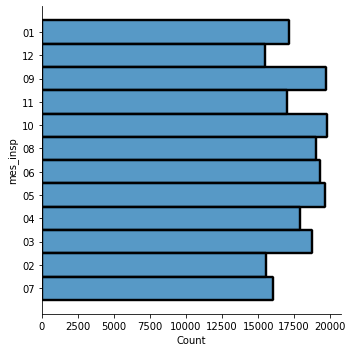

In [55]:
sns.displot(data=df, y="mes_insp")

In [56]:
pivot_2=df#.dropna()
pivot_2=pivot_2[['mes_insp','año_insp','ones']]\
        .groupby(['mes_insp','año_insp']).sum().reset_index()
pivot_2=pivot_2.pivot(index='mes_insp',columns='año_insp',values='ones')
pivot_2=pd.DataFrame(pivot_2)
pivot_2.reset_index(inplace=True)
pivot_2 = pivot_2[['mes_insp','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']]

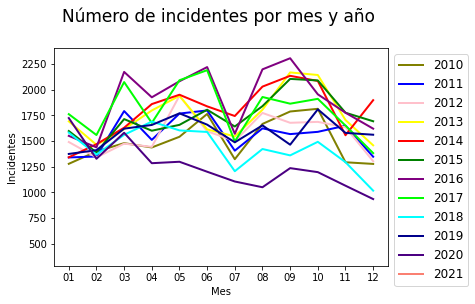

In [58]:
# multiple line plot
plt.plot('mes_insp', '2010', data=pivot_2, color='olive', linewidth=2)
plt.plot('mes_insp', '2011', data=pivot_2, color='blue', linewidth=2)
plt.plot('mes_insp', '2012', data=pivot_2, color='pink', linewidth=2)
plt.plot('mes_insp', '2013', data=pivot_2, color='yellow', linewidth=2)
plt.plot('mes_insp', '2014', data=pivot_2, color='red', linewidth=2)
plt.plot('mes_insp', '2015', data=pivot_2, color='green', linewidth=2)
plt.plot('mes_insp', '2016', data=pivot_2, color='purple', linewidth=2)
plt.plot('mes_insp', '2017', data=pivot_2, color='lime', linewidth=2)
plt.plot('mes_insp', '2018', data=pivot_2, color='cyan', linewidth=2)
plt.plot('mes_insp', '2019', data=pivot_2, color='darkblue', linewidth=2)
plt.plot('mes_insp', '2020', data=pivot_2, color='indigo', linewidth=2)
plt.plot('mes_insp', '2021', data=pivot_2, color='salmon', linewidth=2)
plt.title('Número de incidentes por mes y año \n', size = 17)
plt.ylabel('Incidentes')
plt.xlabel('Mes')
aux = plt.legend(bbox_to_anchor=(1, 1), fontsize = 12)